In [45]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# import tensorflow as tf
# tf.VERSION

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import load_model


load data

In [13]:
tmp = np.load("X.npy")
X = np.zeros((tmp.shape[0], tmp.shape[1], tmp.shape[2], 1))
X[:,:,:,0] = np.load("X.npy")
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [46]:
loaded_model = load_model("kmeans_cnn_incl_spin_model.h5")

In [63]:
ypred = loaded_model.predict_classes(X)

In [47]:
from vis.visualization import visualize_activation, visualize_cam
from vis.utils import utils
from keras import activations
from vis.input_modifiers import Jitter
%matplotlib inline
plt.rcParams['figure.figsize'] = (40, 40)

# Swap softmax with linear
loaded_model.layers[-1].activation = activations.linear
#Save and then reload to reload graph
loaded_model.save('~/2_iter_model/o')
model3 = load_model('~/2_iter_model/o')


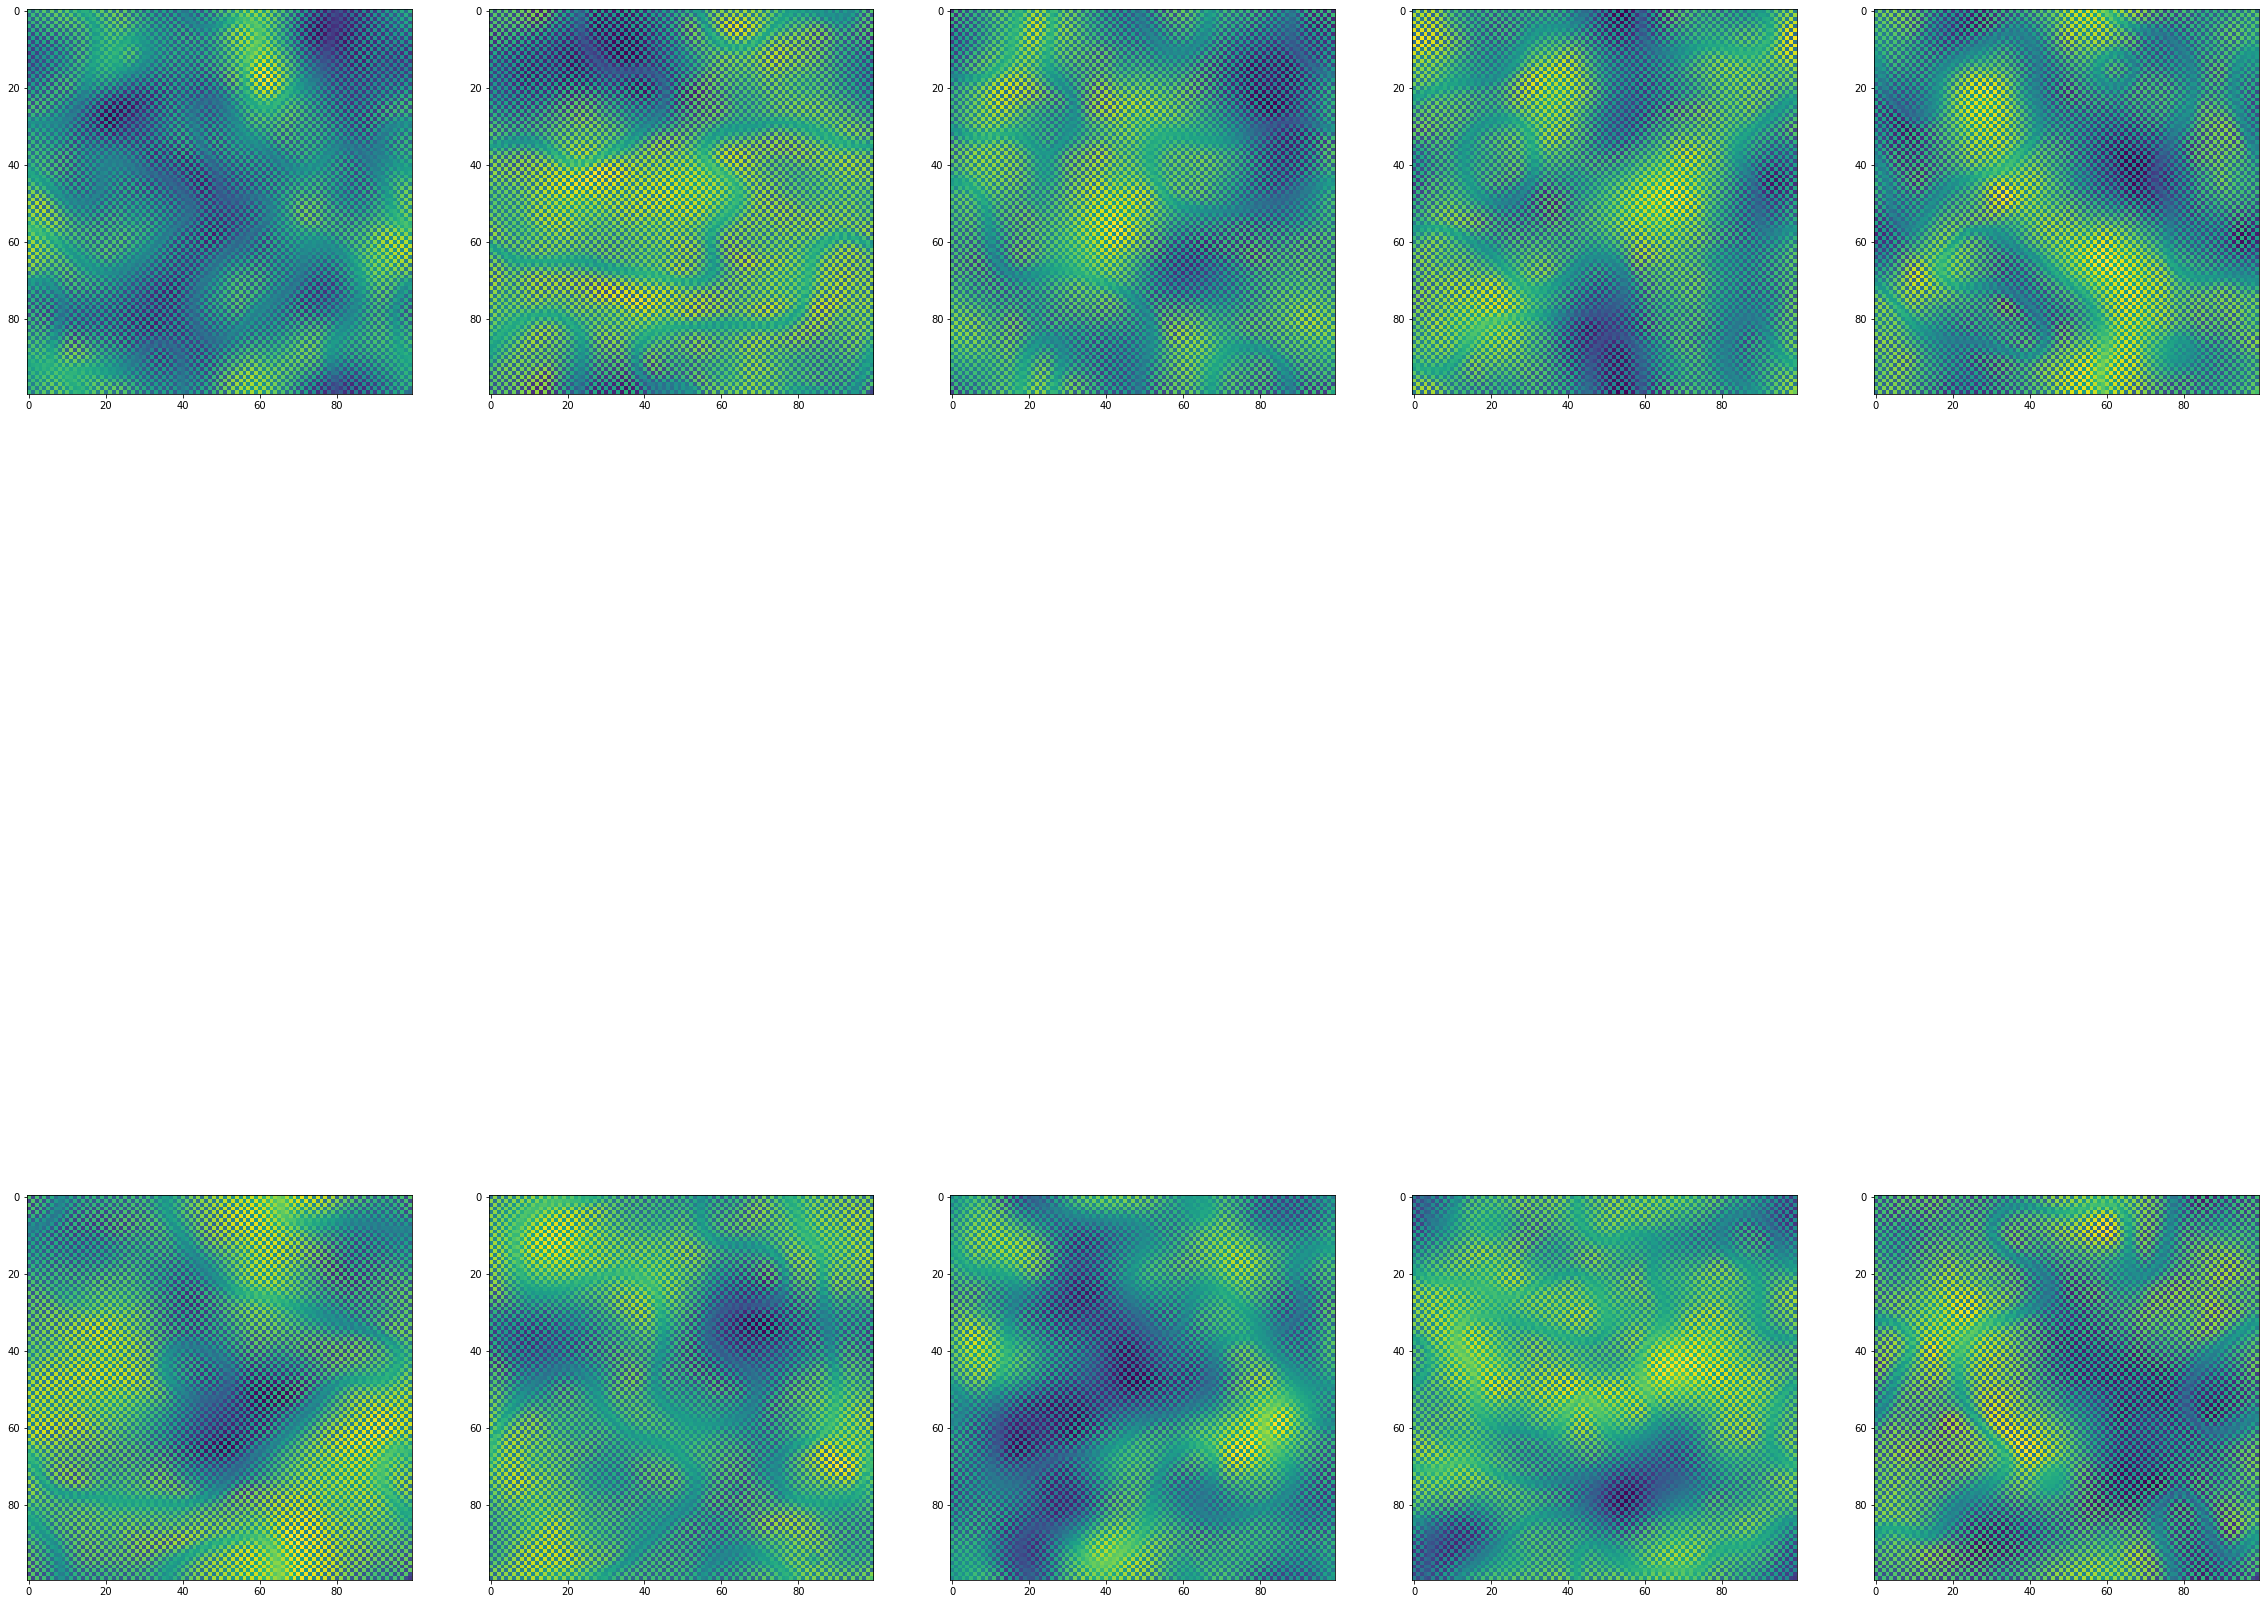

In [96]:
imgs = []

for filter_idx in range(10):
    ax1=plt.subplot(2, 5, filter_idx + 1)
    img = visualize_activation(loaded_model, -1, filter_indices=filter_idx, input_modifiers=[Jitter(16)])
    imgs.append(img)
    ax1.imshow(img[..., 0])

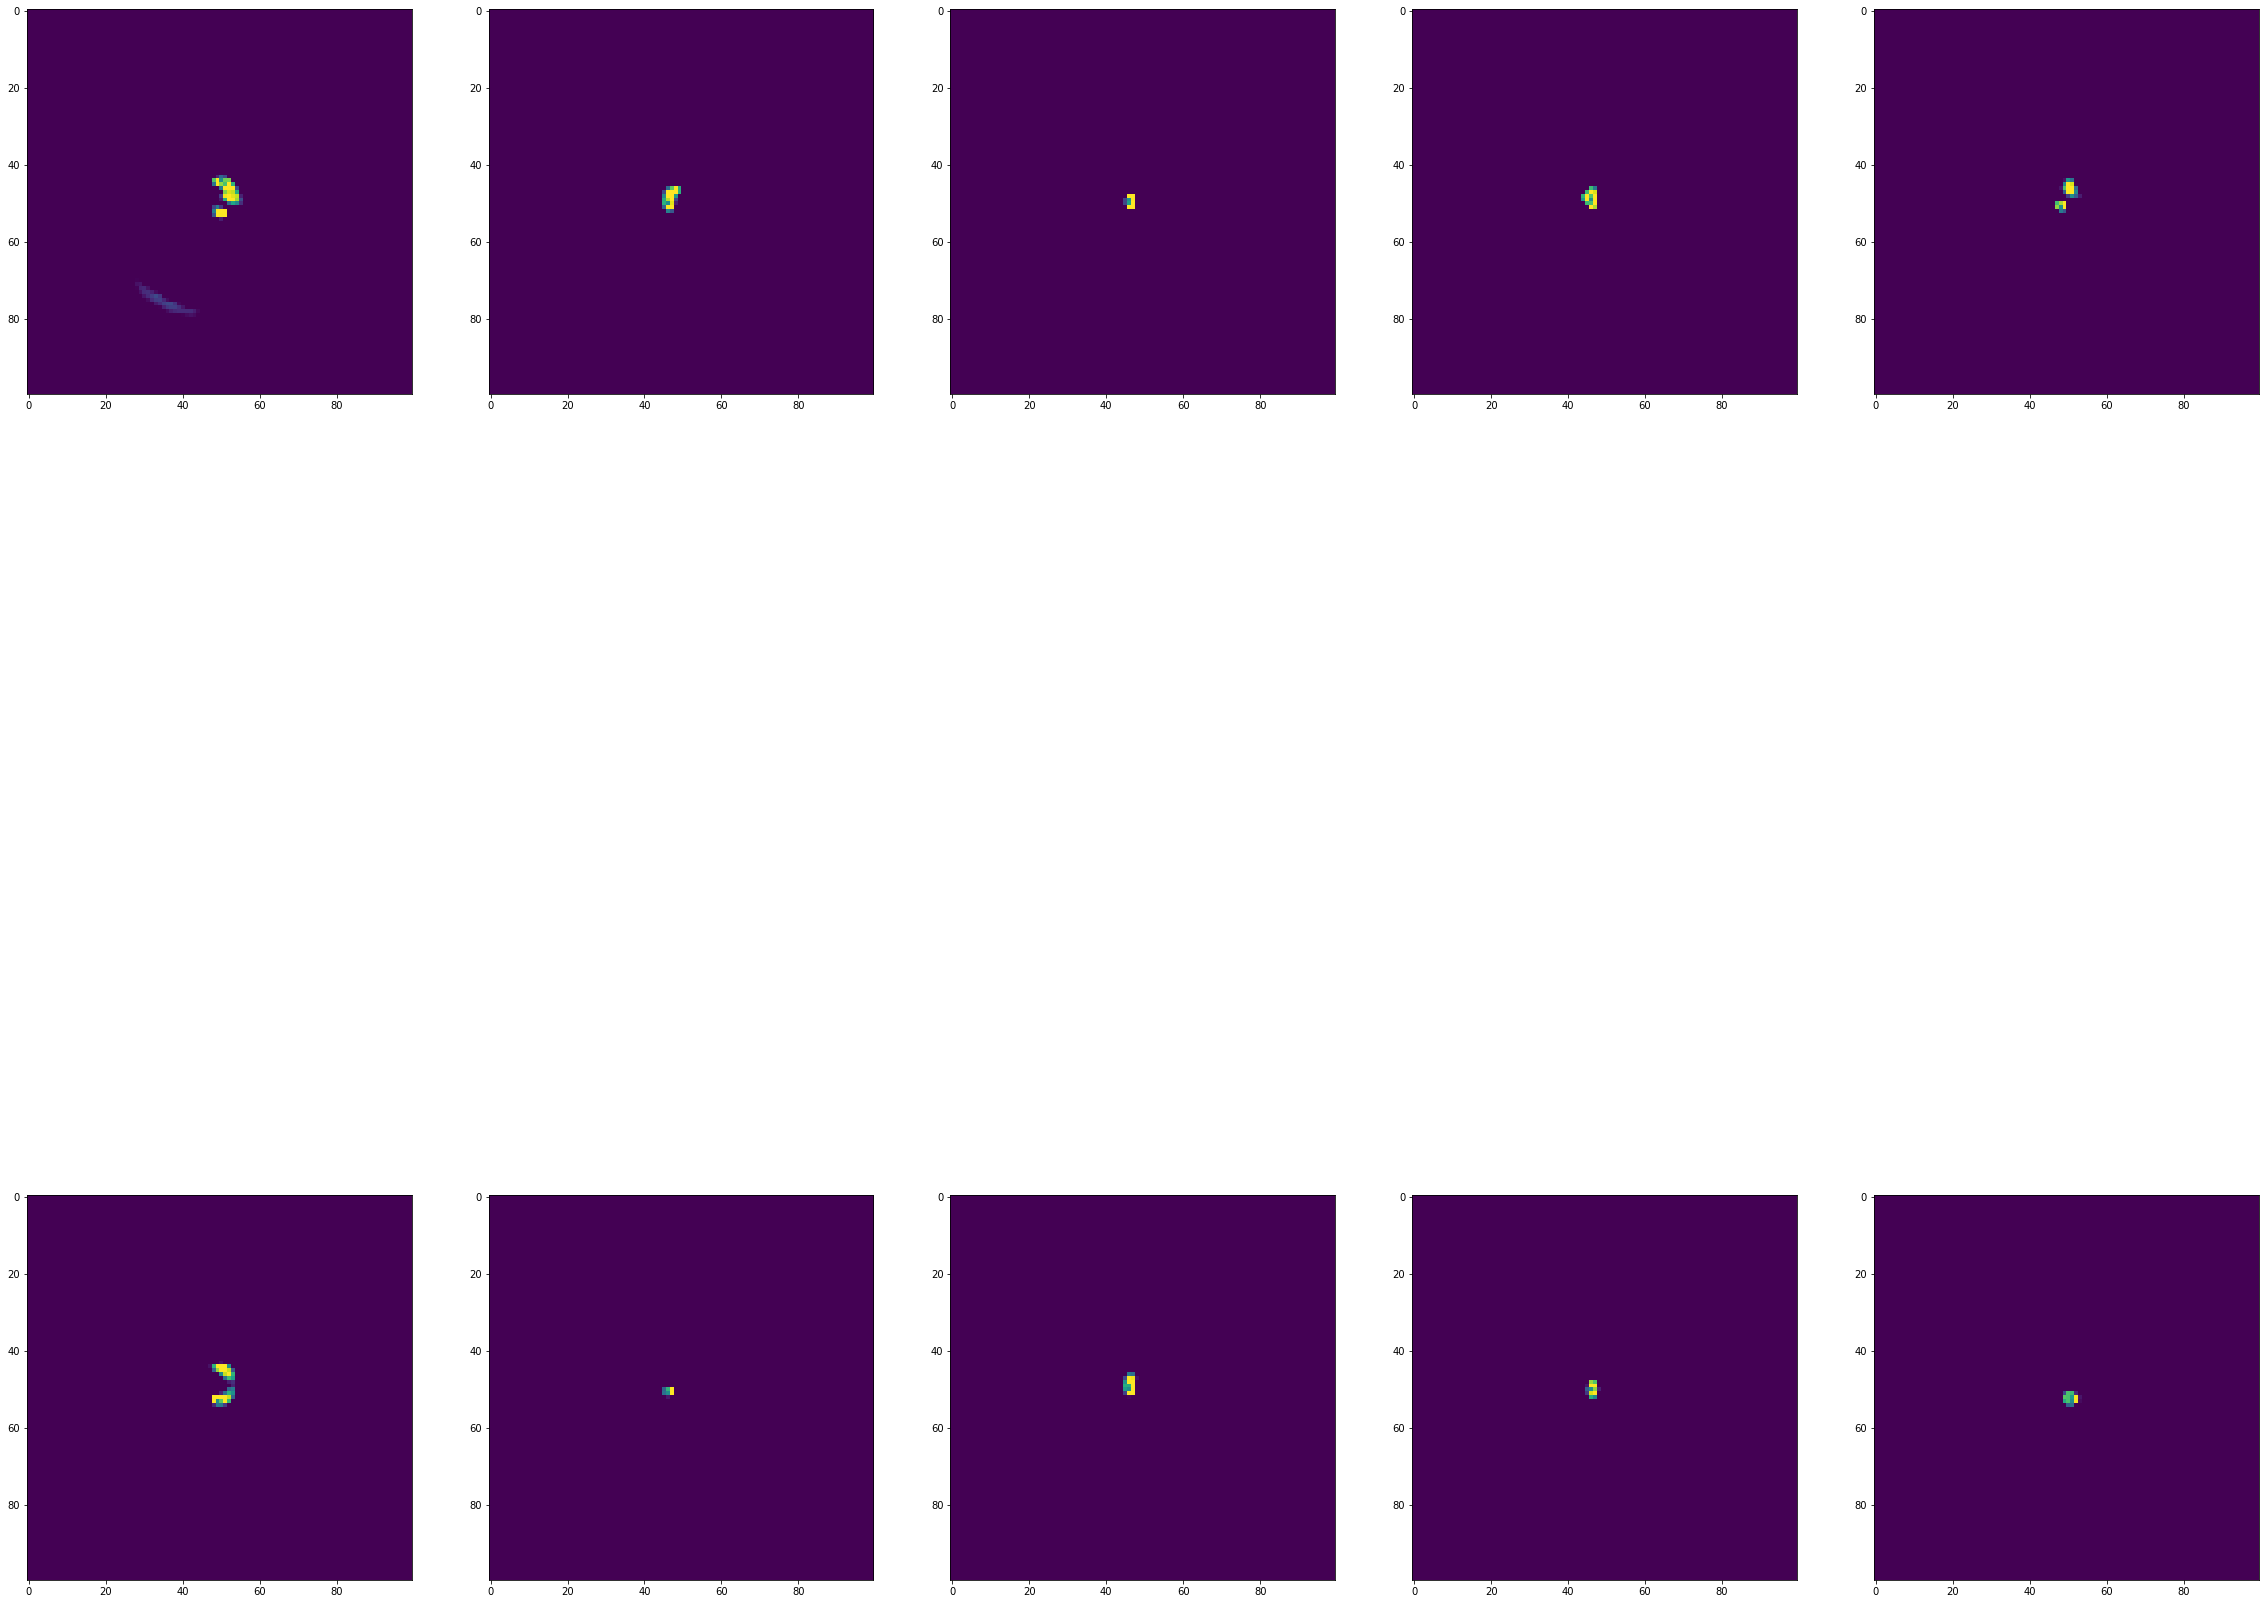

In [92]:
# from vis.visualization import visualize_cam

# imgs_cam = []

# for filter_idx in range(10):
#     ax1=plt.subplot(2, 5, filter_idx + 1)
#     img = visualize_cam(model3, -1, filter_indices=filter_idx, seed_input=X[25])
#     imgs.append(img)
#     ax1.imshow(img[..., 0])


In [100]:
#predict on the activation max images - this should return each of their classes? TODO, doesn't work as expected
act_map_pred = loaded_model.predict(np.array(imgs))
[np.argmax(row) for row in act_map_pred]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

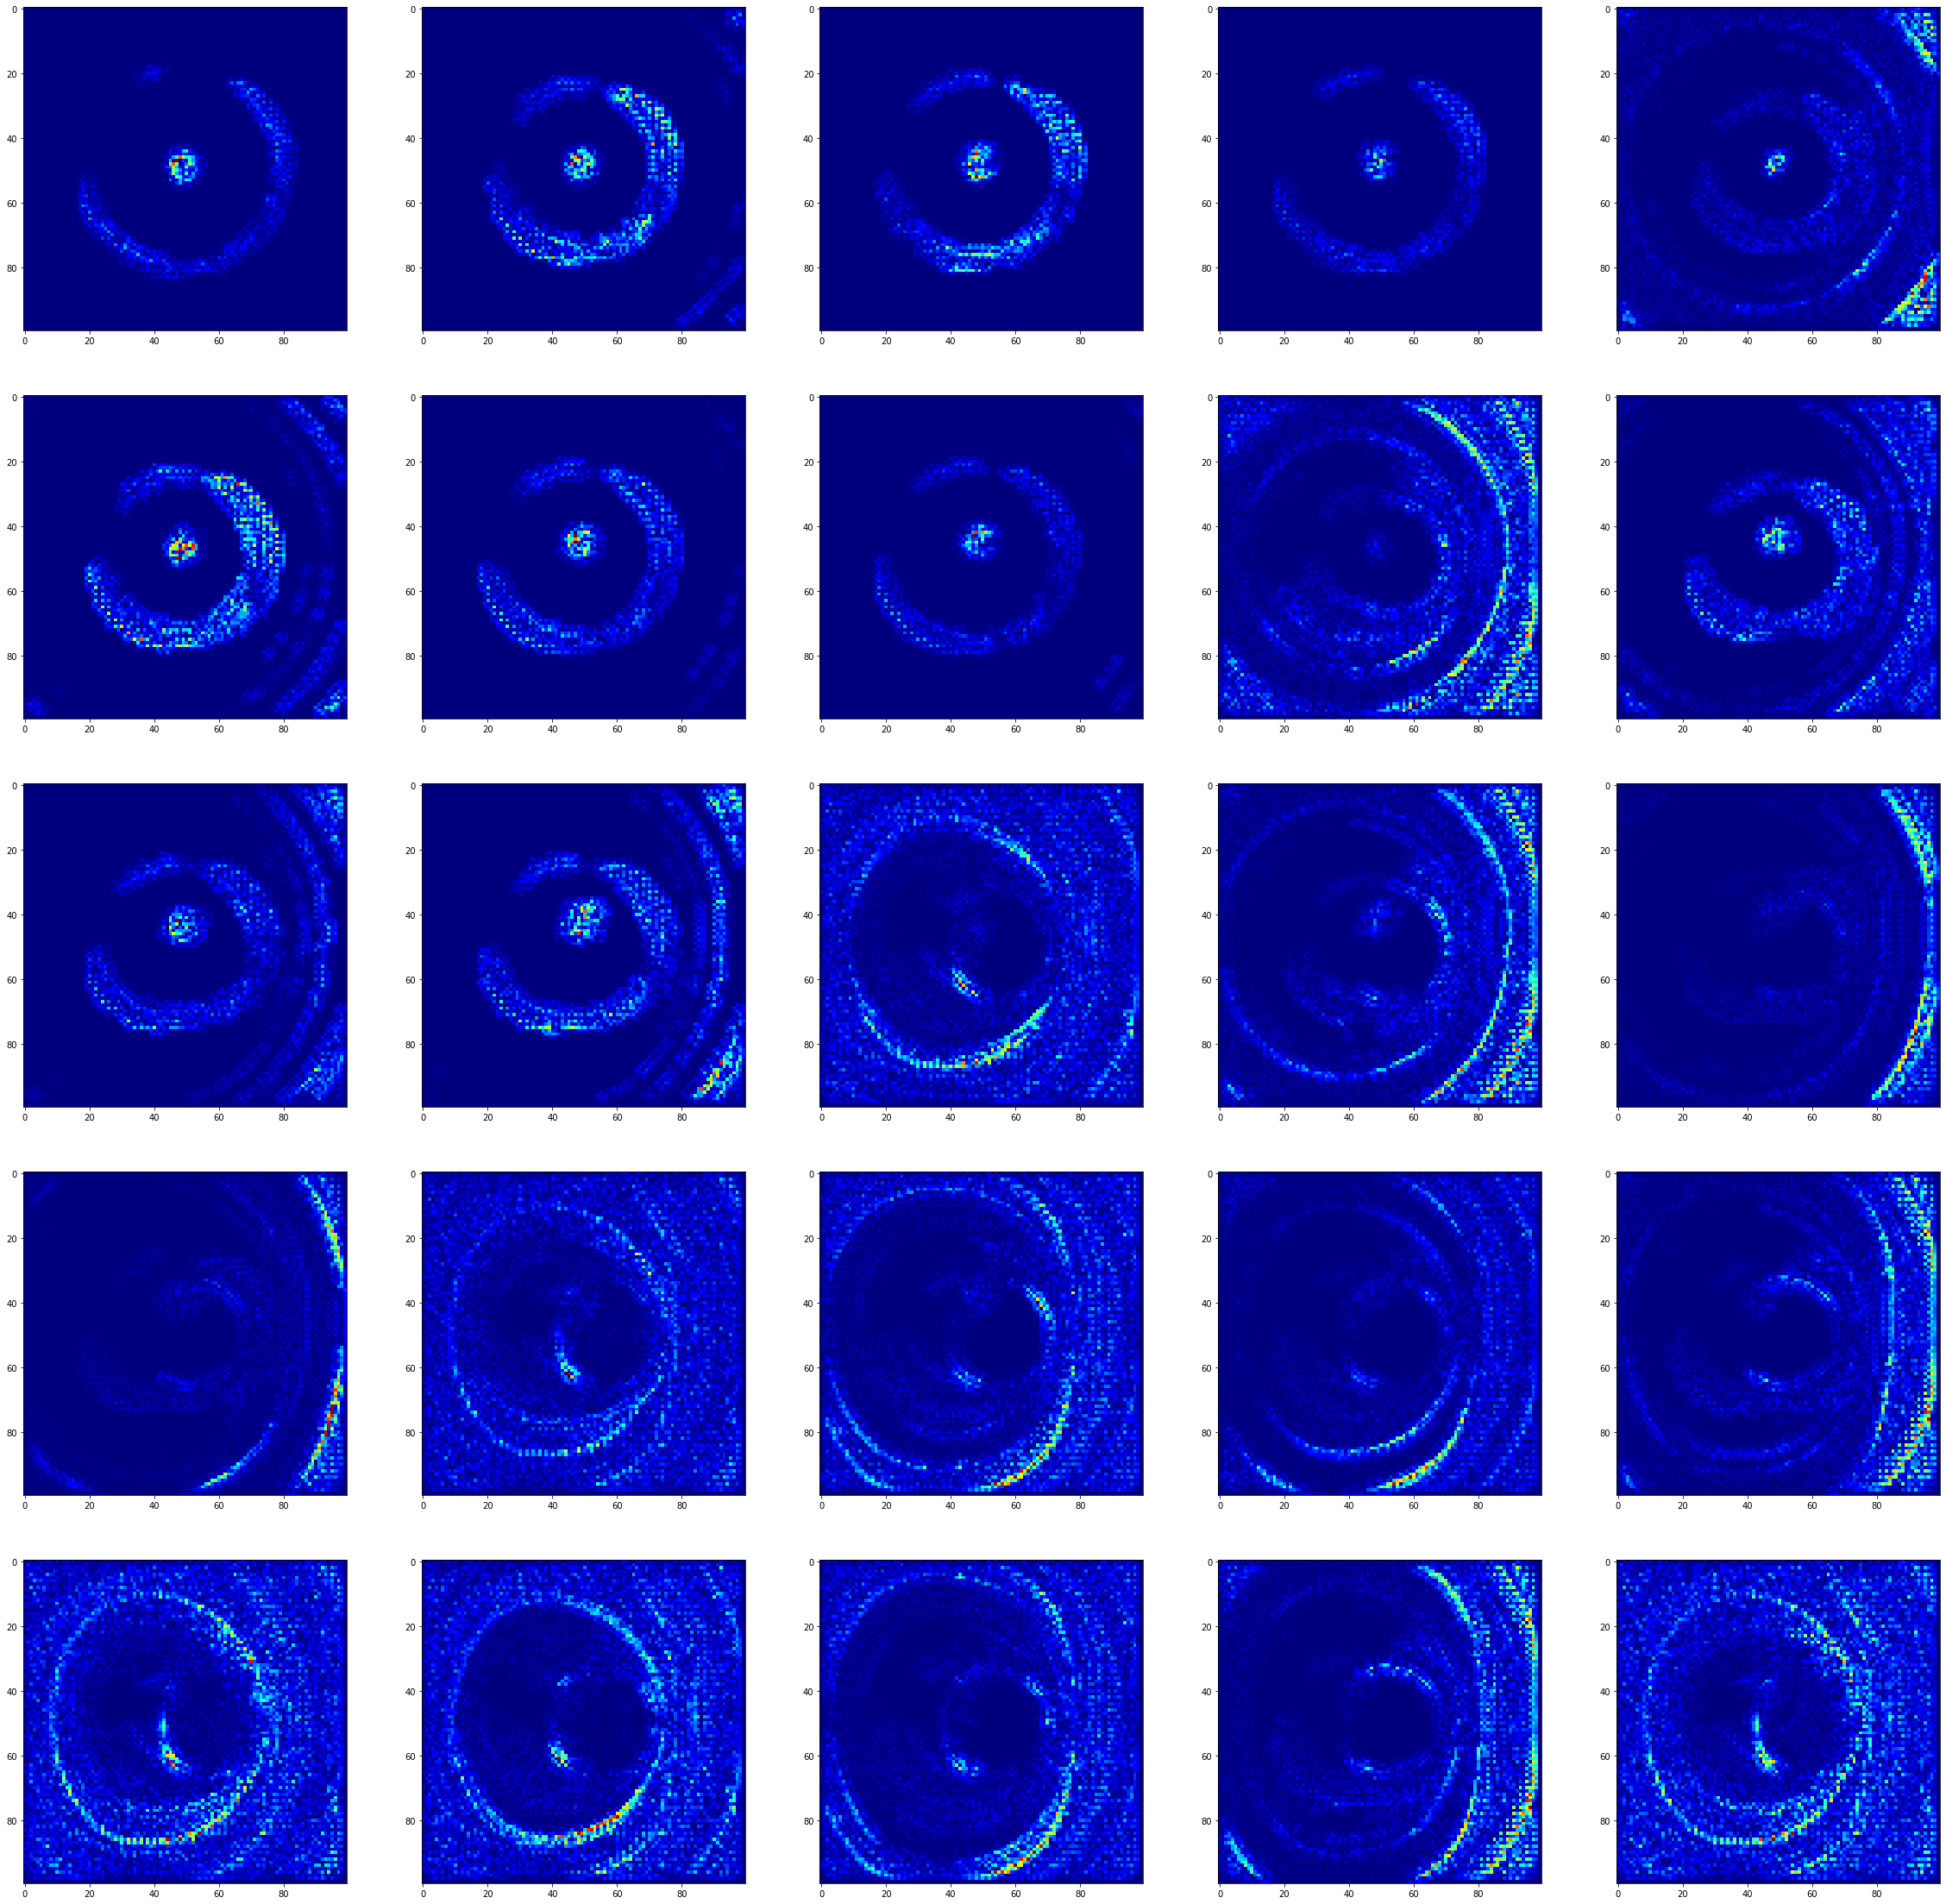

In [99]:
from vis.visualization import visualize_saliency
plt.rcParams['figure.figsize'] = (40, 40)

idxs = [int(x) for x in np.linspace(0,9089, 25)]
for i, seed_idx in enumerate(idxs):
    ax1=plt.subplot(5, 5, i+1)
    grads = visualize_saliency(model3, -1, filter_indices=0, seed_input=X[seed_idx])
    im = ax1.imshow(grads, cmap='jet')
#     ax1.colorbar()

#     ax1.show()

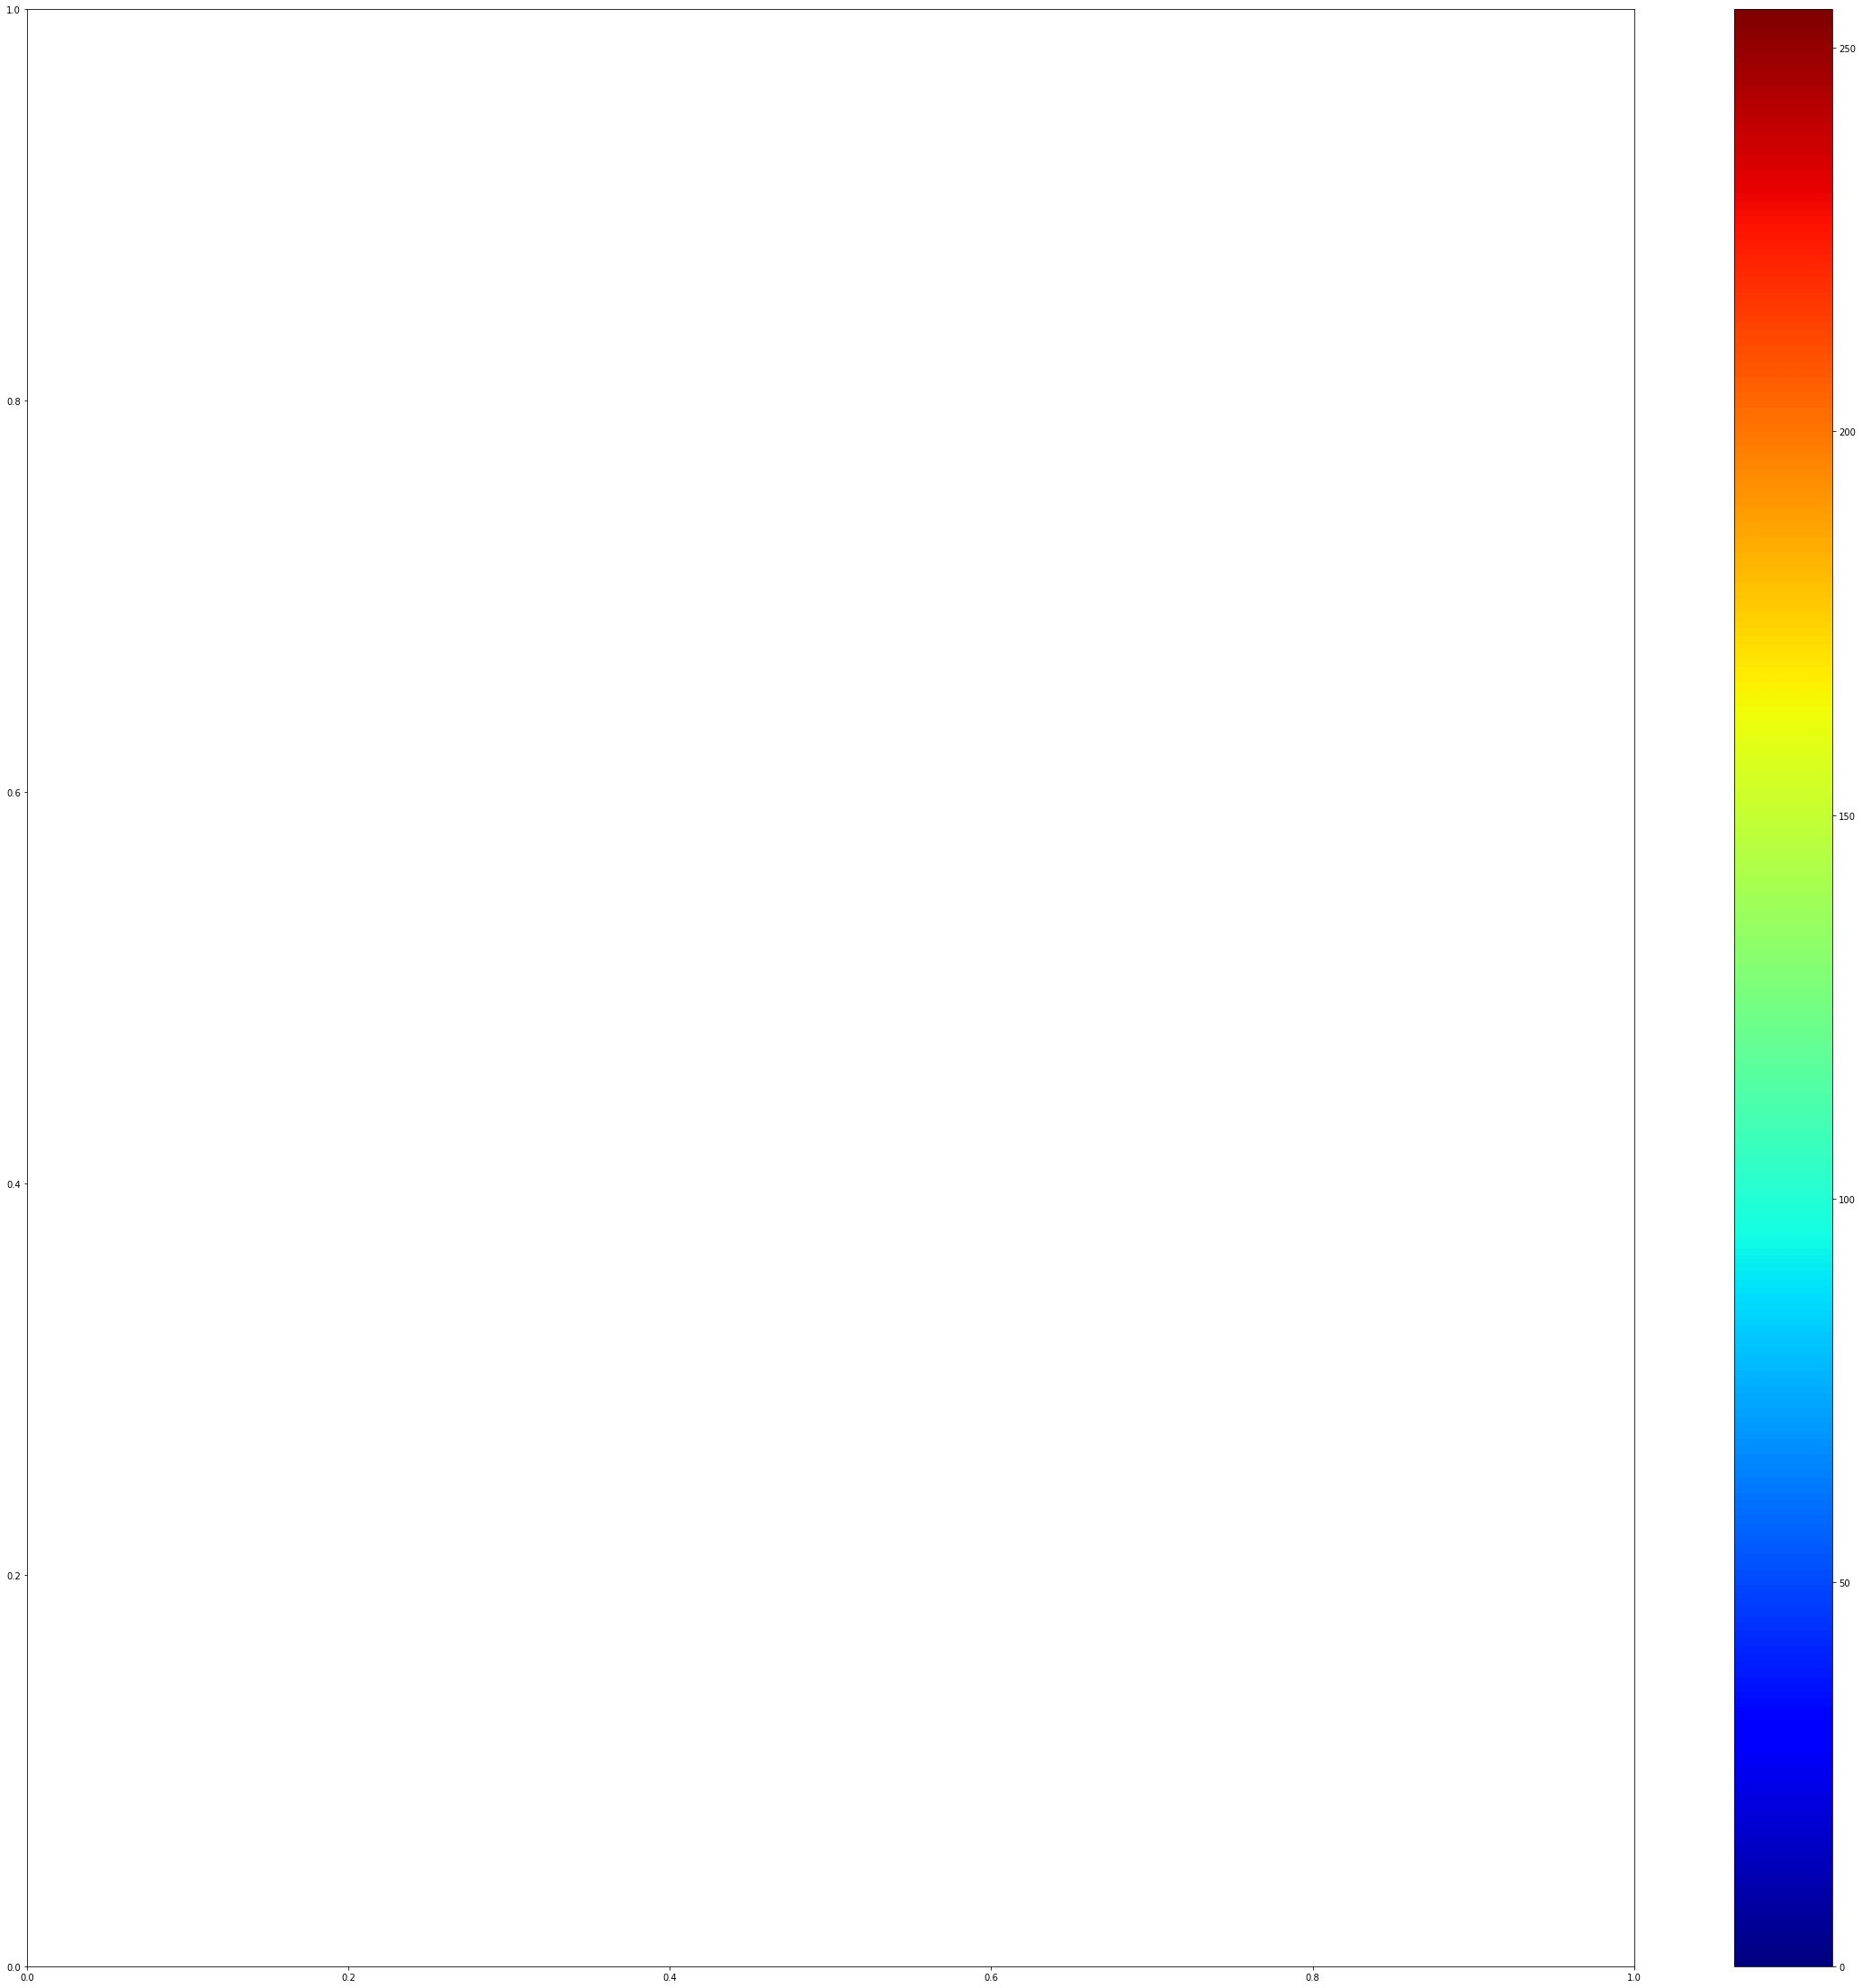

In [98]:
plt.figure()
colorbar = plt.colorbar(im)

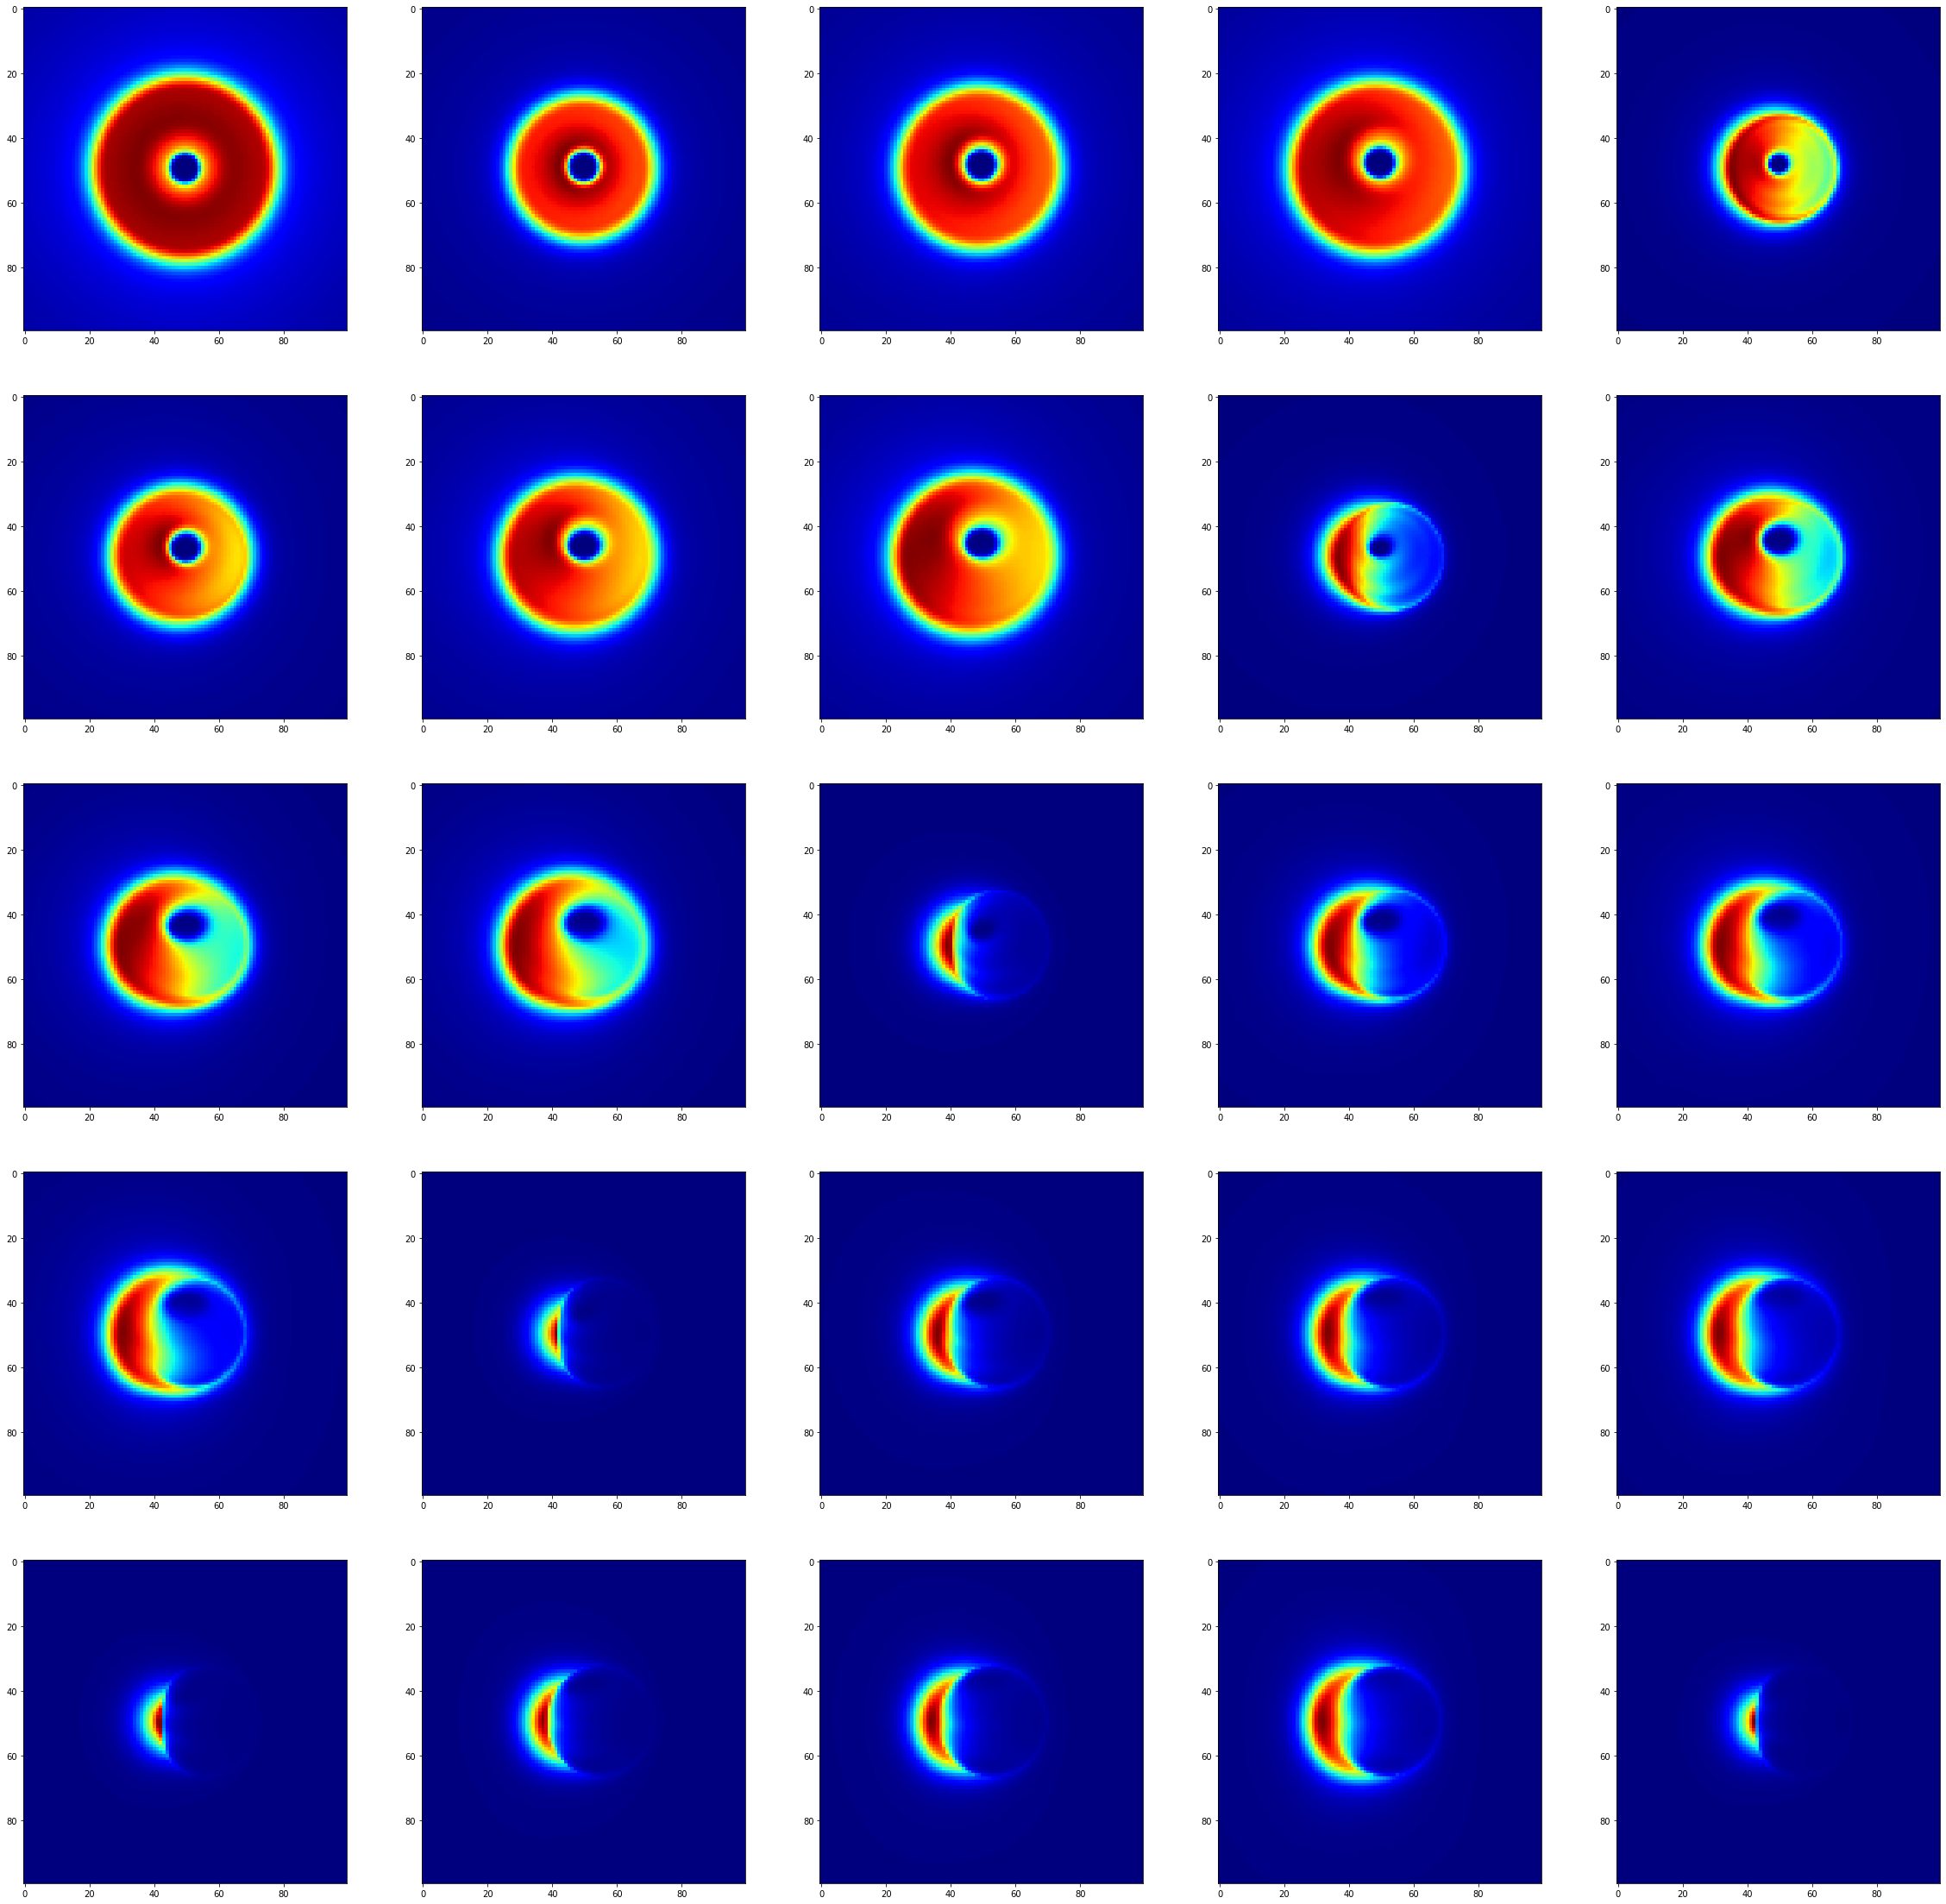

In [84]:
# from vis.visualization import visualize_saliency
plt.rcParams['figure.figsize'] = (40, 40)

idxs = [int(x) for x in np.linspace(0,9089, 25)]
for i, seed_idx in enumerate(idxs):
    ax1=plt.subplot(5, 5, i+1)
#     grads = visualize_saliency(model3, -1, filter_indices=0, seed_input=X[seed_idx])
    ax1.imshow(X[seed_idx].reshape(100,100), cmap='jet')
#     ax1.show()